In [1]:
import sys
sys.path.append('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini')





___   ___  _______ .__   __.   ______   .__   __.        .___________.   __  __             _____    _____    ____  
\  \ /  / |   ____||  \ |  |  /  __  \  |  \ |  |        |           |  |  \/  |    /\     / ____|  |_   _| /  ___| 
 \  V  /  |  |__   |   \|  | |  |  |  | |   \|  |  _   _ `---|  |----`  | \  / |   /  \    | |  __    | |   | |      
  >   <   |   __|  |  . `  | |  |  |  | |  . `  | | \ | |    |  |       | |\/| |  / /\ \   | | |_ |   | |   | |      
 /  .  \  |  |____ |  |\   | |  `--`  | |  |\   | |  \| |    |  |       | |  | | / ____ \  | |__| |  _| |_  | |___  
/__/ \__\ |_______||__| \__|  \______/  |__| \__| |_|\__|    |__|       |_|  |_|/_/    \_\ \ _____| |_____| \_____|  
powered by Giovanni Volta, Chiara Capelli and Shingo Kazama (c)




Configuration file:  /home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini


In [2]:
Config = cp.ConfigParser()
Config.read(PMT.config_file)

led_window   = [Config.getint('window_pars','led_windows_left'), 
                Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), 
                Config.getint('window_pars','noise_windows_right')]
print(led_window, noise_window)

[75, 110] [30, 65]


In [3]:
import strax
print(strax.__file__)
import straxen
print(straxen.__file__)
strax.Mailbox.DEFAULT_MAX_MESSAGES = 2
st = straxen.contexts.xenonnt_led()

## 75 - 90 ; 75 - 95; 75 - 100; 75 - 105; 75 - 110; 75 - 115; 75 - 120
#st = st.new_context(config=dict(led_window=(led_window[0], led_window[0]), 
#                                noise_window=(noise_window[0], noise_window[0])
                                
st = st.new_context(storage=[strax.DataDirectory(PMT.straxdata, provide_run_metadata=False)], 
                     config=dict(led_window=(led_window[0],led_window[1]), 
                                 noise_window=(noise_window[0], noise_window[1]),
                                 channel_list=(0,494)))
st.show_config('led_calibration')

/dali/lgrandi/strax/strax/strax/__init__.py
/home/gvolta/XENONnT/straxen/straxen/__init__.py


/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


,option,default,current,applies_to,help
0,baseline_window,"(0, 50)",<OMITTED>,"(led_calibration,)",Window (samples) for baseline calculation.
1,led_window,"(75, 100)","(75, 110)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
2,noise_window,"(35, 60)","(30, 65)","(led_calibration,)",Window (samples) to analysis the noise
3,channel_list,"(0, 494)","(0, 494)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
4,record_length,110,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Number of samples per raw_record
5,digitizer_sampling_resolution,10,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Digitizer sampling resolution
6,run_start_time,0,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",time of start run (s since unix epoch)
7,daq_chunk_duration,5000000000,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Duration of regular chunks in ns
8,daq_overlap_chunk_duration,500000000,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Duration of intermediate/overlap chunks in ns
9,daq_compressor,lz4,<OMITTED>,"(raw_records, raw_records_he, raw_records_aqmon, raw_records_mv)",Algorithm used for (de)compressing the live data


In [ ]:
st.data_info('led_calibration')

In [4]:
!ls /dali/lgrandi/giovo/XENONnT/strax_data/

007333-led_calibration-7f5pd3wm6e  007338-led_calibration-7f5pd3wm6e
007333-led_calibration-qsvx2z734h  007339-led_calibration-7f5pd3wm6e
007334-led_calibration-7f5pd3wm6e  007340-led_calibration-7f5pd3wm6e
007334-led_calibration-qsvx2z734h  007341-led_calibration-7f5pd3wm6e
007335-led_calibration-7f5pd3wm6e  007341-led_calibration-qsvx2z734h
007335-led_calibration-qsvx2z734h  180219_1049-led_calibration-wwtqsw57ux
007336-led_calibration-7f5pd3wm6e  180219_1059-led_calibration-wwtqsw57ux
007336-led_calibration-qsvx2z734h  old_env


In [5]:
run = '007339'
st.size_mb(run, 'led_calibration')

/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/dali/lgrandi/strax/strax/strax/context.py:373: UserWarning: Option gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


6012.9544

In [6]:
data = st.get_array(run, 'led_calibration', max_workers=20, seconds_range=(0,30))
#rr = st.get_array(run, 'led_calibration', max_workers=20, second_range=(0,1))

In [ ]:
len(data['area_led'])

### Occupancy estimation

In [7]:
led = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
noise = np.zeros(len(data), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
led['channel'] = data['channel']
led['area'] = data['area_led']
noise['channel'] = data['channel']
noise['area'] = data['area_noise']

In [8]:
channels = np.arange(0, 494, 1)

In [9]:
bad_ch = [ ]
for ch in channels:
    try:
        PMT.get_moments(led, [ch])
        PMT.get_moments(noise, [ch])
    except:
        bad_ch.append(ch)
good_ch = [ ]
for ch in channels:
    if ch not in bad_ch:
        good_ch.append(ch)
bad_ch = np.asarray(bad_ch)

In [18]:
def get_occupancy(data_s, data_b, channels=np.arange(0,494, 1), bad_channels=[], order=10):
        ''' 
        Function that occupancy (poisson parameter) of data distribution.
        
        #TODO: comments the important steps 
        
        Args:
            1. data_s: signal PMT(s) array.
            2. data_b: noise PMT(s) array.
            3. channels: list of PMTs n° to analize.
            
        Note:
        
        Output:
            1. Occupancy:
                - estimated occupancy: 
                - estimated occupancy error:
                - iteration: 
                - occupancy: 
                - occupancy error:
                - threshold: 
                - occupancy smooth: 
                - scaling factor:
                - entries: 
        '''  
    
        datatype = [('channel', np.int16), 
                    ('estimated occupancy', np.float32), 
                    ('estimated occupancy error', np.float32),
                    ('iteration', np.int16),
                    ('occupancy', object), ('occupancy error', object), ('threshold', object), 
                    ('occupancy smooth', object), ('scaling factor', np.float32), 
                    ('entries', np.int16)]

        Occupancy =  np.zeros(len(channels), dtype = datatype)

        for i, ch in enumerate(channels):
            print(ch)
            if ch in bad_channels:
                print('Bad channel\n########')
                Occupancy[i]['channel']                   = ch
                Occupancy[i]['estimated occupancy']       = 0
                Occupancy[i]['estimated occupancy error'] = 0
                Occupancy[i]['iteration']                 = 0
                Occupancy[i]['occupancy']                 = 0
                Occupancy[i]['occupancy error']           = 0
                Occupancy[i]['threshold']                 = 0
                Occupancy[i]['occupancy smooth']          = 0
                Occupancy[i]['scaling factor']            = 0
                Occupancy[i]['entries']                   = 0
            else:
                
                moments_s = PMT.get_moments(data_s, channels=[ch])
                moments_b = PMT.get_moments(data_b, channels=[ch])
                area_s = data_s[data_s['channel']==ch]['area']
                signal, bins     = np.histogram(area_s, range=(-1000, 5000), bins=6000)

                area_b = data_b[data_b['channel']==ch]['area']
                background, bins = np.histogram(area_b, range=(-1000, 5000), bins=6000)

                E_s = moments_s[moments_s['channel']==ch]['mean']

                if E_s > 0:
                    threshold = -35
                else:
                    threshold = 0

                ini_threshold = threshold    
                end_threshold = 50
                start = np.digitize(-1000, bins)

                occupancy     = []
                occupancy_err = []
                thr           = []

                tot_entries_b = np.sum(background)

                while threshold < end_threshold: 
                    bin_threshold = np.digitize(threshold, bins)

                    Ab = np.sum(background[start:bin_threshold])
                    As = np.sum(signal[start:bin_threshold])

                    if Ab > 0 and As > 0:
                        f = Ab/tot_entries_b
                        l = -np.log(As/Ab)
                        l_err = np.sqrt((np.exp(l) + 1. - 2.*(Ab/tot_entries_b))/Ab)
                        
                        if l_err/l <= 0.05:
                            occupancy.append(l)
                            occupancy_err.append(l_err)
                            thr.append(threshold)
                    threshold += 1

                num = len(occupancy) - 1
                if num % 2 == 0:
                    num = num - 1
                try:
                    occupancy_smooth = savgol_filter(occupancy, num, order)
                except:
                    occupancy_smooth = savgol_filter(occupancy, num, num-1)
                    print('Check: ', ch)
                dummy = occupancy_smooth.argsort()[::-1]
                for idx in range(0, len(dummy)):
                    if occupancy_err[dummy[idx]]/occupancy[dummy[idx]] < 0.02:           
                        estimated_occupancy = occupancy[dummy[idx]]
                        estimated_occupancy_err = occupancy_err[dummy[idx]]
                        itr = dummy[idx]
                        break
                    else:
                        estimated_occupancy = 0
                        estimated_occupancy_err = 0
                        itr = 0

                Occupancy[i]['channel']                   = ch
                Occupancy[i]['estimated occupancy']       = estimated_occupancy
                Occupancy[i]['estimated occupancy error'] = estimated_occupancy_err
                Occupancy[i]['iteration']                 = itr
                Occupancy[i]['occupancy']                 = occupancy
                Occupancy[i]['occupancy error']           = occupancy_err
                Occupancy[i]['threshold']                 = thr
                Occupancy[i]['occupancy smooth']          = occupancy_smooth
                Occupancy[i]['scaling factor']            = f
                Occupancy[i]['entries']                   = tot_entries_b
                if estimated_occupancy <=0:
                    print(estimated_occupancy, '\n########')
        return Occupancy


In [19]:
Occ = get_occupancy(led, noise, channels, bad_ch)

0
0.4388582978609116 
########
1
0.37921207411362284 
########
2
0.2509053889363827 
########
3
0.3096936994809675 
########
4
0.29349270064701066 
########
5
0.2281481467054333 
########
6
0.44985836836891 
########
7
0.4517629433227556 
########
8
0.4724091248246949 
########
9
0.3511656583026946 
########
10
0.29413969828562553 
########
11
0.3134665106920679 
########
12
0.30457569314952426 
########
13
0.2752460346729975 
########
14
0.30590637036851953 
########
15
0.22949770362422675 
########
16
0.36189426374370487 
########
17
0.28885402460809056 
########
18
0.3205912017787446 
########
19
0.31162433600579714 
########
20
0.4043517454154991 
########
21
0.31709448568047965 
########
22
0.2955571871976648 
########
23
0.31986181687752213 
########
24
0.32566055769396823 
########
25
0.3403244861086487 
########
26
0.26891079232885234 
########
27
0.282426430510308 
########
28
0.27370213789424835 
########
29
0.31894923556106863 
########
30
0.2781677413248579 
########
31
0.3

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in double_scalars


0.2665714228317721 
########
56
0.31361571933506205 
########
57
0.32849997614755083 
########
58
Bad channel
59
0.3477967958145481 
########
60
Bad channel
61
0.32792932222050875 
########
62
0.31352262395238717 
########
63
0.2950736317123901 
########
64
0.3452193435757552 
########
65
0.28552291516284567 
########
66
0.330952846677584 
########
67
0.3805453471579632 
########
68
0.3215719277617736 
########
69
0.25758319303138383 
########
70
0.31186975351486995 
########
71
0.3282609094065509 
########
72
0.35122304948526606 
########
73
0.32091350842224675 
########
74
Bad channel
75
Bad channel
76
0.3115274084421291 
########
77
0.324525017105831 
########
78
0.34465290996489156 
########
79
0.34070586827567273 
########
80
0.2800301866742222 
########
81
0.3085532348294754 
########
82
0.3154566260744179 
########
83
0.30563319023921426 
########
84
0.24662646188691417 
########
85
0.2555083223597008 
########
86
0.3108367644958214 
########
87
0.347527074860614 
########
88
0.

0.22976359258332804 
########
313
0.21462159766537262 
########
314
0.23266851645562944 
########
315
0.2241432855107444 
########
316
0.25892016212564284 
########
317
0.2479312490452607 
########
318
0.15393083316941605 
########
319
Bad channel
320
0.16291869757154198 
########
321
0.161247964439103 
########
322
Bad channel
323
0.22948908483838318 
########
324
0.26177331957042127 
########
325
0.21197460741658095 
########
326
0.2499726273094311 
########
327
0.254886696525855 
########
328
0.21089447847598614 
########
329
0.2891352455163832 
########
330
0.23607959562445407 
########
331
0.22129055510766327 
########
332
0.23572974654904297 
########
333
0.23464751821277863 
########
334
0.09955291405019144 
########
335
0.1630811722685047 
########
336
Bad channel
337
0.1737081773104554 
########
338
0.16027465871005658 
########
339
0.23129926580568994 
########
340
0.2554264919642625 
########
341
0.258732704908089 
########
342
0.2436834086939241 
########
343
0.267353716062

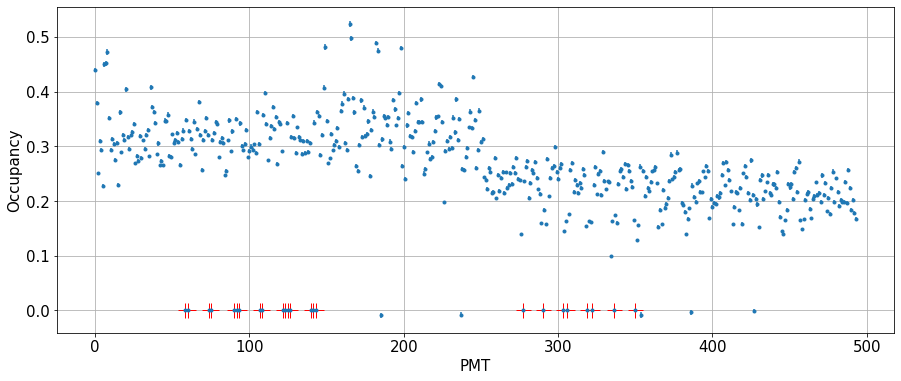

In [23]:
plt.figure(figsize=(15, 6))
plt.errorbar(good_ch, Occ[Occ[['estimated occupancy'], yerr=Occ['estimated occupancy error'],
             fmt='.')
plt.plot(bad_ch, np.zeros(len(bad_ch)), 'r+', ms=10)
plt.xlabel('PMT', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

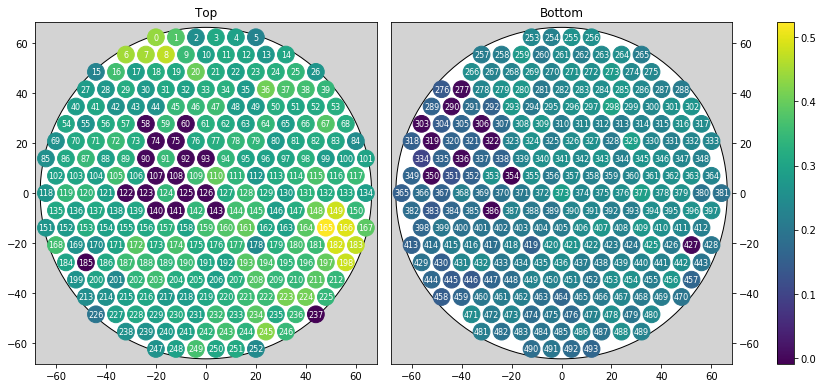

In [21]:
straxen.plot_pmts(Occ['estimated occupancy'])

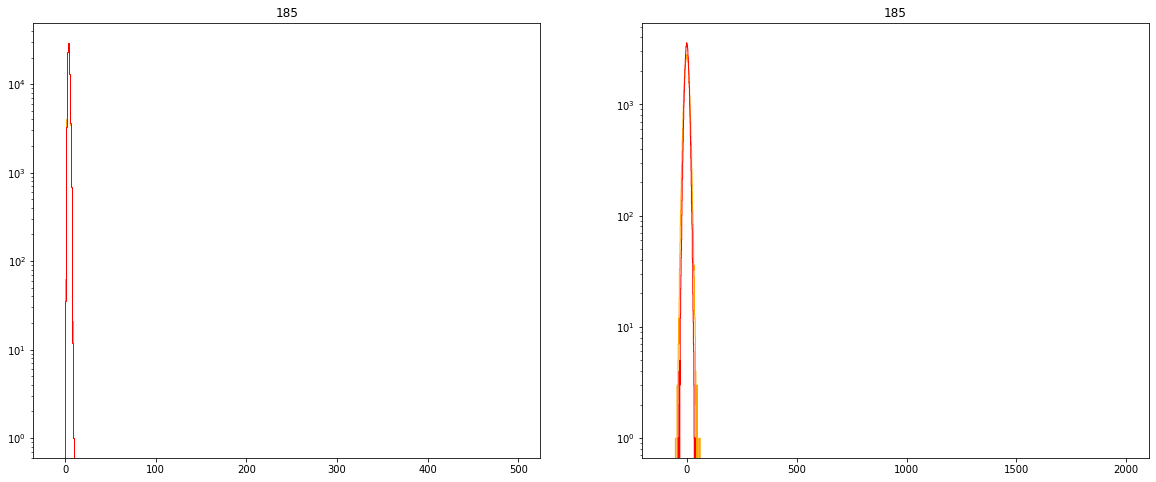

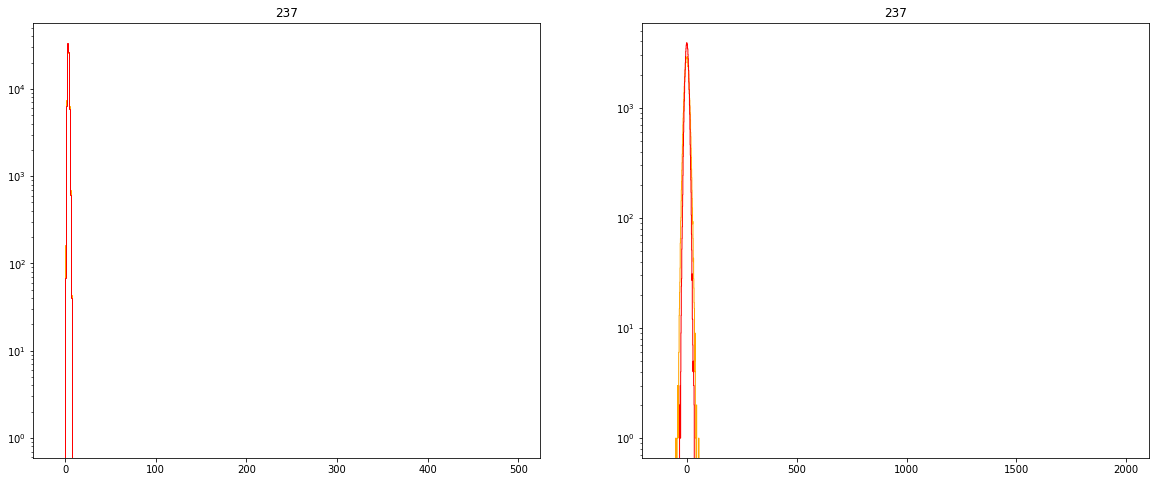

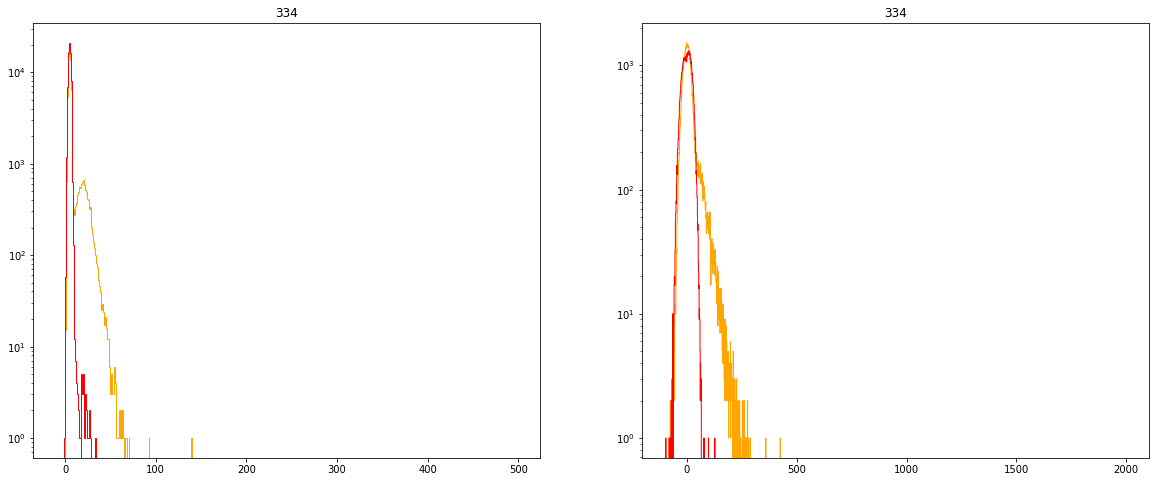

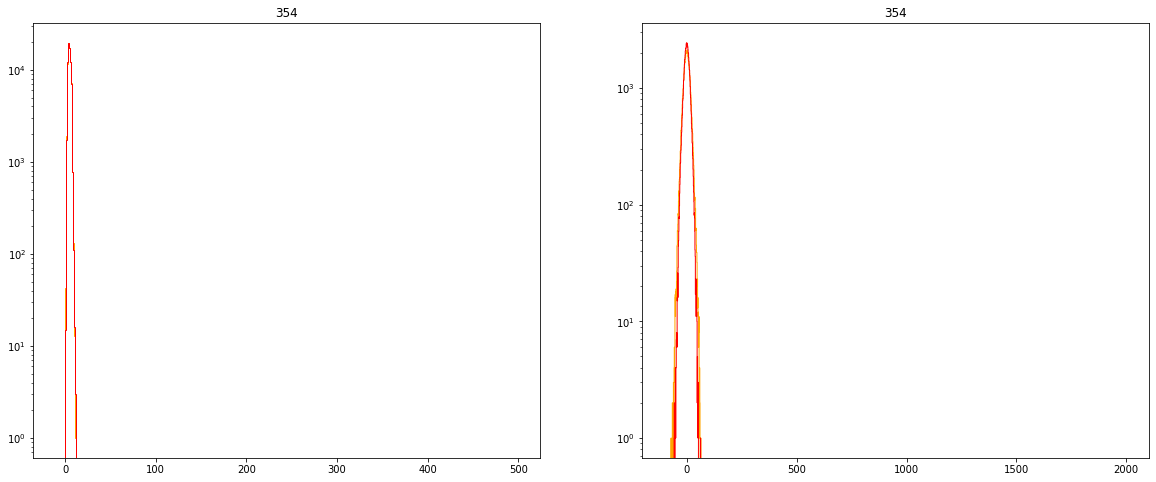

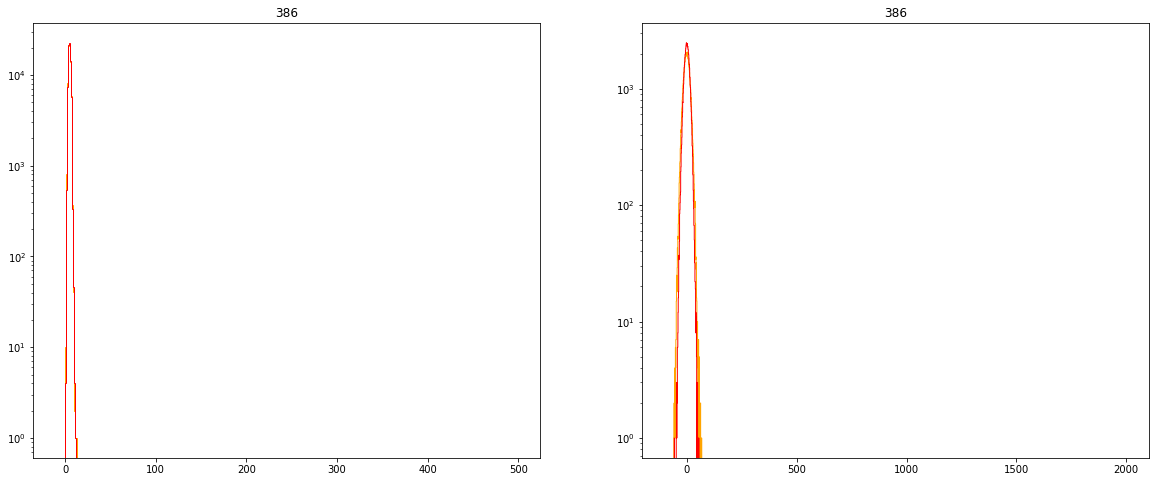

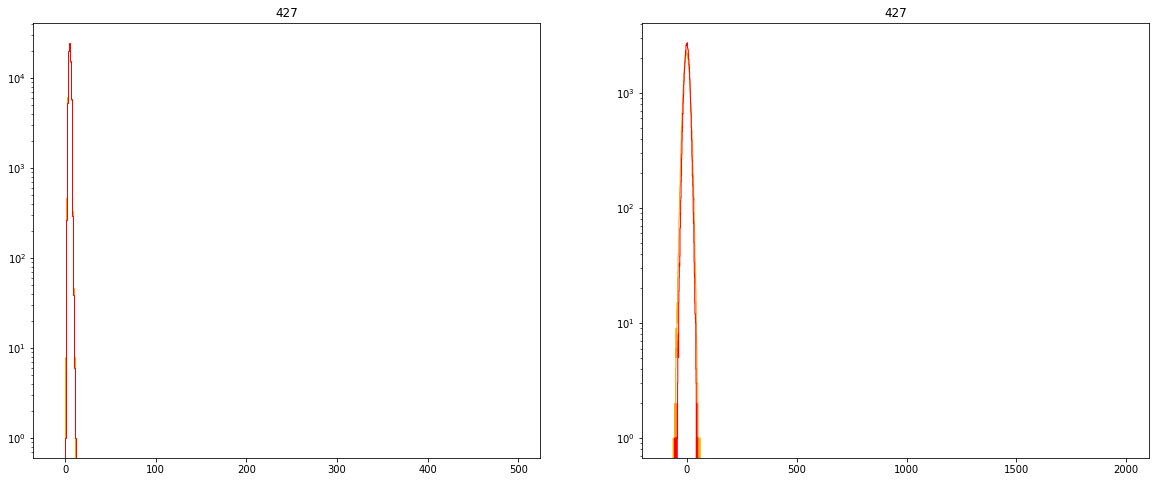

In [22]:
strange_ch = Occ[Occ['estimated occupancy']<0.1]['channel']

for ch in strange_ch:
    if ch not in bad_ch:
        plt.figure(figsize=(20, 8))

        plt.subplot(121)
        ADC = np.arange(-10, 500, 1)
        plt.hist(data[data['channel']==ch]['amplitude_led'], bins=ADC, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['amplitude_noise'], bins=ADC, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.subplot(122)
        ADC_area = np.arange(-100, 2000, 1)
        plt.hist(data[data['channel']==ch]['area_led'], bins=ADC_area, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['area_noise'], bins=ADC_area, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(channels, Occ['estimated occupancy'], '.')
plt.plot(bad_ch, np.zeros(len(bad_ch)), 'r+', ms=10)
plt.xlabel('PMT', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()
plt.ylim(None, +0.55)

In [ ]:
strange_ch = Occ[Occ['estimated occupancy']<0.1]['channel']

In [ ]:
for ch in channels:
    if ch not in strange_ch:
        plt.figure(figsize=(20, 8))

        plt.subplot(121)
        ADC = np.arange(-10, 500, 1)
        plt.hist(data[data['channel']==ch]['amplitude_led'], bins=ADC, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['amplitude_noise'], bins=ADC, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.subplot(122)
        ADC_area = np.arange(-100, 2000, 1)
        plt.hist(data[data['channel']==ch]['area_led'], bins=ADC_area, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['area_noise'], bins=ADC_area, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.show()

In [ ]:
for ch in strange_ch:
    if ch not in bad_ch:
        plt.figure(figsize=(20, 8))

        plt.subplot(121)
        ADC = np.arange(-10, 500, 1)
        plt.hist(data[data['channel']==ch]['amplitude_led'], bins=ADC, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['amplitude_noise'], bins=ADC, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.subplot(122)
        ADC_area = np.arange(-100, 2000, 1)
        plt.hist(data[data['channel']==ch]['area_led'], bins=ADC_area, histtype='step',color='orange')
        plt.hist(data[data['channel']==ch]['area_noise'], bins=ADC_area, histtype='step',color='red')
        plt.title(str(ch))
        plt.yscale('log')

        plt.show()

In [ ]:
for ch in strange_ch:
    if ch not in bad_ch:
        print('#### ', ch, ' ###')
        temp = PMT.get_occupancy(led, noise, channels=[ch])
        print('PMT: ', temp['channel'])
        print(temp['estimated occupancy'])

In [ ]:
def get_occupancy(data_s, data_b, channels=np.arange(0,494, 1), bad_channels=[], order=10):
        ''' 
        Function that occupancy (poisson parameter) of data distribution.
        
        #TODO: comments the important steps 
        
        Args:
            1. data_s: signal PMT(s) array.
            2. data_b: noise PMT(s) array.
            3. channels: list of PMTs n° to analize.
            
        Note:
        
        Output:
            1. Occupancy:
                - estimated occupancy: 
                - estimated occupancy error:
                - iteration: 
                - occupancy: 
                - occupancy error:
                - threshold: 
                - occupancy smooth: 
                - scaling factor:
                - entries: 
        '''  
    
        datatype = [('channel', np.int16), 
                    ('estimated occupancy', np.float32), 
                    ('estimated occupancy error', np.float32),
                    ('iteration', np.int16),
                    ('occupancy', object), ('occupancy error', object), ('threshold', object), 
                    ('occupancy smooth', object), ('scaling factor', np.float32), 
                    ('entries', np.int16)]

        Occupancy =  np.zeros(len(channels), dtype = datatype)

        for i, ch in enumerate(channels):
            if ch in bad_channels:
                Occupancy[i]['channel']                   = ch
                Occupancy[i]['estimated occupancy']       = 0
                Occupancy[i]['estimated occupancy error'] = 0
                Occupancy[i]['iteration']                 = 0
                Occupancy[i]['occupancy']                 = 0
                Occupancy[i]['occupancy error']           = 0
                Occupancy[i]['threshold']                 = 0
                Occupancy[i]['occupancy smooth']          = 0
                Occupancy[i]['scaling factor']            = 0
                Occupancy[i]['entries']                   = 0
            else:
                moments_s = PMT.get_moments(data_s, channels=[ch])
                print('Segnale: ', moments_s)
                moments_b = PMT.get_moments(data_b, channels=[ch])
                print('Background: ', moments_b)
                area_s = data_s[data_s['channel']==ch]['area']
                signal, bins     = np.histogram(area_s, range=(-1000, 5000), bins=6000)

                area_b = data_b[data_b['channel']==ch]['area']
                background, bins = np.histogram(area_b, range=(-1000, 5000), bins=6000)

                E_s = moments_s[moments_s['channel']==ch]['mean']
                print('Media segnale: ', E_s)
                E_b = moments_b[moments_b['channel']==ch]['mean']
                print('Media segnale: ', E_b)

                if E_s > 0:
                    threshold = -35
                else:
                    threshold = 0

                ini_threshold = threshold    
                end_threshold = 50
                start = np.digitize(-1000, bins)

                occupancy     = []
                occupancy_err = []
                thr           = []

                tot_entries_b = np.sum(background)

                while threshold < end_threshold: 
                    bin_threshold = np.digitize(threshold, bins)

                    Ab = np.sum(background[start:bin_threshold])
                    As = np.sum(signal[start:bin_threshold])

                    if Ab > 0 and As > 0:
                        f = Ab/tot_entries_b
                        l = -np.log(As/Ab)
                        l_err = np.sqrt((np.exp(l) + 1. - 2.*(Ab/tot_entries_b))/Ab)
                        
                        if l_err/l <= 0.05:
                            print(l_err, '\t', l, '\t', l_err/l)
                            occupancy.append(l)
                            occupancy_err.append(l_err)
                            thr.append(threshold)
                    threshold += 1

                num = len(occupancy) - 1
                if num % 2 == 0:
                    num = num - 1

                occupancy_smooth = savgol_filter(occupancy, num, order)
                dummy = occupancy_smooth.argsort()[::-1]
                for idx in range(0, len(dummy)):
                    if occupancy_err[dummy[idx]]/occupancy[dummy[idx]] < 0.02:           
                        estimated_occupancy = occupancy[dummy[idx]]
                        estimated_occupancy_err = occupancy_err[dummy[idx]]
                        itr = dummy[idx]
                        break
                    else:
                        estimated_occupancy = 0
                        estimated_occupancy_err = 0
                        itr = 0

                Occupancy[i]['channel']                   = ch
                Occupancy[i]['estimated occupancy']       = estimated_occupancy
                Occupancy[i]['estimated occupancy error'] = estimated_occupancy_err
                Occupancy[i]['iteration']                 = itr
                Occupancy[i]['occupancy']                 = occupancy
                Occupancy[i]['occupancy error']           = occupancy_err
                Occupancy[i]['threshold']                 = thr
                Occupancy[i]['occupancy smooth']          = occupancy_smooth
                Occupancy[i]['scaling factor']            = f
                Occupancy[i]['entries']                   = tot_entries_b

        return Occupancy

In [ ]:
for ch in strange_ch:
    if ch not in bad_ch:
        print('#### ', ch, ' ###')
        temp = get_occupancy(led, noise, channels=[ch])
        print('PMT: ', temp['channel'])
        print(temp['estimated occupancy'])

In [ ]:
plt.figure(figsize=(15,6))
ch = 5
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'g-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=100, color='green', linestyles='dashed')

ch = 6
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'r-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=100, color='red', linestyles='dashed')

ch = 14
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy'][0], 'b-', label=str(ch))
plt.hlines(Occ[Occ['channel']==ch]['estimated occupancy'], xmin=-40, xmax=100, color='blue', linestyles='dashed')

plt.legend(loc=0)
plt.xlim(-40)

plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()

In [ ]:
plt.figure(figsize=(15,6))
ch = 5
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'g-', label=str(ch))

ch = 6
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'r-', label=str(ch))

ch = 14
plt.plot(Occ[Occ['channel']==ch]['threshold'][0], Occ[Occ['channel']==ch]['occupancy smooth'][0], 'b-', label=str(ch))

plt.legend(loc=0)
plt.xlim(-40)

plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Occupancy', fontsize=15)
plt.tick_params(labelsize=15)
plt.grid()